In [179]:
import pandas as pd
train = pd.read_csv('train.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

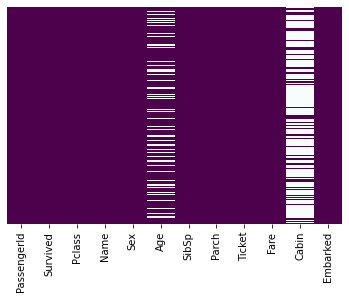

In [181]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [182]:
#Now, let's finally replace some missing values :-)

train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

<AxesSubplot:>

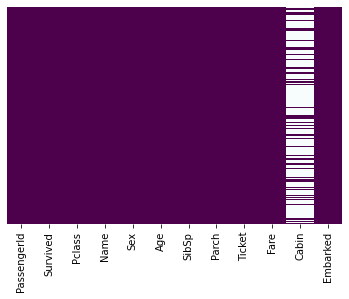

In [183]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r')

The Cabin column has a lot of missing values. We can create an indicator variable which takes value one in case cabin is missing.

In [184]:
train['cabin_missing'] = pd.isna(train['Cabin'])

In [185]:
train['cabin_missing'].describe()

count      891
unique       2
top       True
freq       687
Name: cabin_missing, dtype: object

<AxesSubplot:xlabel='cabin_missing', ylabel='count'>

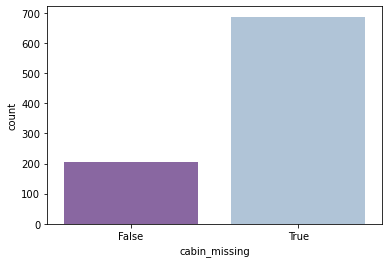

In [186]:
sns.set_style(None)
sns.countplot(x='cabin_missing', data=train, palette='BuPu_r')

In [187]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [188]:
train['Cabin'].isna().sum() 

687

In [189]:
train['Cabin'].count()

204

In [190]:
print("The percentage of NaNs in Cabin: {:.2f}".format(train['Cabin'].isna().sum() /(train['Cabin'].count()+train['Cabin'].isna().sum() )*100),"%")

The percentage of NaNs in Cabin: 77.10 %


In [191]:
corrM = train.corr()

corrM

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_missing
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658,-0.019919
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,-0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,0.725541
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.271987
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.040460
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,-0.036987
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,-0.482075
cabin_missing,-0.019919,-0.316912,0.725541,-0.271987,0.040460,-0.036987,-0.482075,1.000000


<AxesSubplot:>

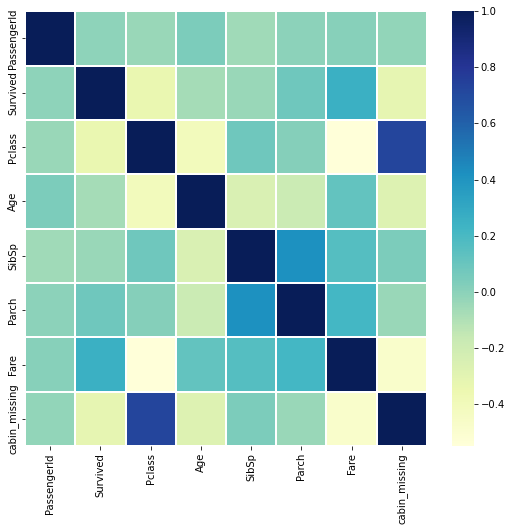

In [192]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrM, ax=ax, cmap="YlGnBu", linewidths = 0.1)

In [193]:
print("Top 5 correlations in absolute terms:", )
corrM.unstack().abs().drop_duplicates().sort_values(ascending=False)[1:6]

Top 5 correlations in absolute terms:


Pclass  cabin_missing    0.725541
        Fare             0.549500
Fare    cabin_missing    0.482075
SibSp   Parch            0.414838
Pclass  Age              0.407015
dtype: float64

In [194]:
corrM.unstack().abs().drop_duplicates().unstack().iloc[:,-1:].sort_values(by=['cabin_missing'], ascending=False)

,cabin_missing
Pclass,0.725541
Fare,0.482075
Survived,0.316912
Age,0.271987
SibSp,0.040460
Parch,0.036987
PassengerId,0.019919


train.dropna(inplace=True) might cause troubles because 77.1% of data will be dropped. Moreover, cabin_missing variable is highly correlated with variables Pclass (0.72), Fare(0.48), Survived(0.31) and Age(0.27). Subsequently, the regression results will be highly biased, not being able to represent the real situation and having low predictive power. Moreover, this column actually contains information: in format like ‘C123’ first letter refers to the deck.

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  cabin_missing  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


In [196]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


C:\Users\molda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

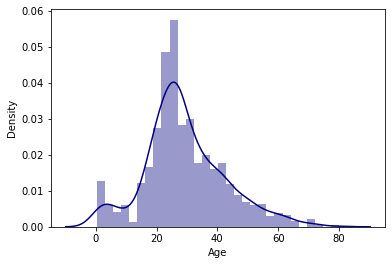

In [197]:
sns.distplot(train['Age'], color='navy', bins=30)

In [198]:
train['Age'].sort_values()

803     0.42
755     0.67
644     0.75
469     0.75
78      0.83
       ...  
116    70.50
96     71.00
493    71.00
851    74.00
630    80.00
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='cabin_missing', ylabel='Age'>

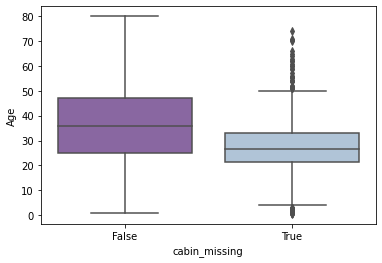

In [199]:
sns.boxplot(x='cabin_missing', y='Age', data=train, palette='BuPu_r')

C:\Users\molda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


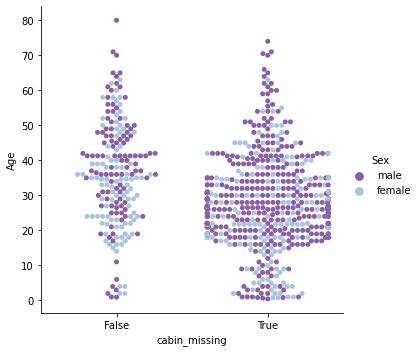

In [200]:
sns.catplot(y='Age', x='cabin_missing', hue="Sex", kind="swarm",  data=train,palette='BuPu_r')

C:\Users\molda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

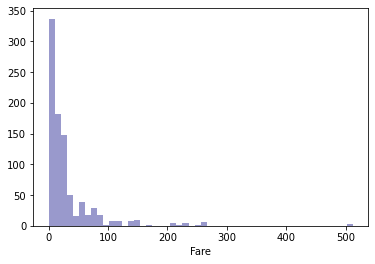

In [201]:
sns.distplot(train['Fare'], color='navy', bins=50, kde=False)

In [202]:
train['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

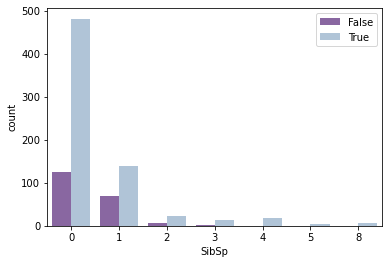

In [203]:
sns.countplot(x='SibSp', hue='cabin_missing', data=train, palette='BuPu_r')
plt.legend(loc='upper right')

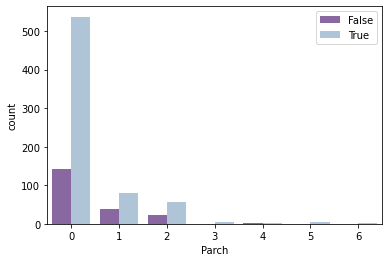

In [204]:
sns.countplot(x='Parch', hue='cabin_missing', data=train, palette='BuPu_r')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

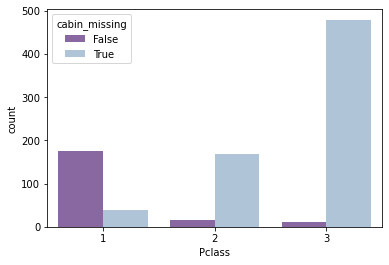

In [205]:
sns.countplot(x='Pclass', hue='cabin_missing', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

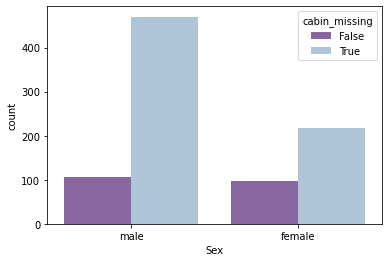

In [206]:
sns.countplot(x='Sex', hue='cabin_missing', data=train, palette='BuPu_r')

In [207]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [208]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [209]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'Cabin'], axis=1, inplace=True)

'PassengerId', 'Name', 'Ticket', 'Cabin' were dropped because they serve as an identity and do not allow estimation of a model

Categorical features such as 'Sex', 'Emberked', 'Pclass' were converted to dummy variables (one value was dropped to avoid dummy variable trap)

In [210]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [211]:
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,1


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X = train.drop('cabin_missing',axis=1)
y = train['cabin_missing']
seed = 12

Variables included in the classification are Survived, Age, SibSp, Parch, Fare, male, Q, S, 2 and 3.

Survived is a binary variable which is 1 if the passender survived, 0 if did not. <br>Age is a continuous variable, with minimum of 0.42 and maximum of 80 in train data. The distribution of this variable is peaked at around 27 years, and smoothly falling afterwards. There were more very small children than that of 10-12 year olds. <br> SibSp is a discrete variable, which represents the number of (siblings+spouse) onboard, it is zero if a passenger did not have spouse nor siblings onboard. <br> Parch is also discrete variable, which represents the number of (Parents+children) onboard, it is zero if a passenger did not have his/her parents nor children onboard. <br> Fare is a continuous variable, with minimum of 0 and maximum of 512.3292. It represents the price of the ticket sold to a traveling group, i.e. it is not the price per passenger but for the group. The distribution of this variable is skewed right with a lot of passengers paying zero price and smoothly falling afterwards. <br> Male is a binary variable which is 1 if the passenger is male and 0 if the passenger is female. <br> Q is a binary variable which is 1 if the traveller mounted from Queenstown and 0 if not.<br> S is a binary variable which is 1 if the traveller mounted from Southampton and 0 if not. <br> If both Q and S are 0, then the passenger mounted from Cherbourg. <br> Variable 2 is also binary and it is 1 if the passenger has second class ticket and 0 if not. <br> Variable 3 is also binary and it is 1 if the passenger has third class ticket and 0 if not. <br> If both 2 and 3 are 0, then the passenger has first class ticket.

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify=y)

In [215]:
y

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: cabin_missing, Length: 891, dtype: bool

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

In [218]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [219]:
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [220]:
predictions

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True,

### Model Evaluation

In [221]:
from sklearn.metrics import classification_report, confusion_matrix

In [222]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.82      0.88      0.85        51
        True       0.96      0.94      0.95       172

    accuracy                           0.93       223
   macro avg       0.89      0.91      0.90       223
weighted avg       0.93      0.93      0.93       223



We have been trying to predict cabin_missing variable for which 0 (False) means that Cabin data was present, while 1 (True) means Cabin data was missing. Precision for 1 was 0.96 representing the proportion of positive identifications which were actually correct (162 out of 168 values predicted to be 1 were correctly predicted), which is pretty good value (over 90%). Precision for 0 was slightly worse (0.82) (45 out of 55 values predicted to be 0 were correctly predicted). <br><br>  Recall for 1 was 0.94, meaning that 94% of actual 1s were correctly classified (there were 162 correct predictions out of 172 actual 1s). Recall for 0 was 0.88, meaning that 88% of actual 0s were correctly classified (there were 45 correct predictions out of 51 actual 0s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was good for 1s as suggested by f1-score of 0.95, and slighly worse for 0s, but still performing good (f1-score for 0s is 0.85).
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> Overall accuracy was 93% which is good one.
<br><br>  Macro average for the precision and recall score is just the harmonic mean of the two classes (precision and recall).
<br><br>  Weighted average is just the average metric of the two classes (precision and recall) weighted by the support/size-of-sample. It is higher than macro average because the fact that there are less 0s than 1s is accounted for and 0s are given lower weight.

As 0s have low proportion in the training data compared to 1s (Almost 3 times less 0s than 1s), here is a slight imbalance classification problem. 
<br><br>
The case when cabin is not missing might be interesting ones, so under imbalance classification problem it could be harder to predict the minority class (0s). Nevertheless, it was pretty good in this case. It could happen that it was more challenging for a model to learn the characteristics of examples from minority class, and to differentiate examples from this class from the majority class.

In [223]:
print(confusion_matrix(y_test, predictions))

[[ 45   6]
 [ 10 162]]


C:\Users\molda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


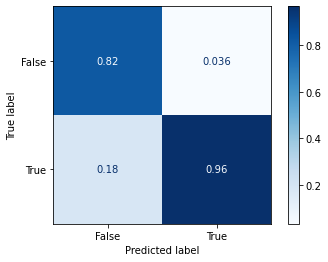

In [224]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [225]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [226]:
print(confusion_matrix(y_test,dummy_clf.predict(X_test)))

[[  0  51]
 [  0 172]]


In [227]:
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        51
        True       0.77      1.00      0.87       172

    accuracy                           0.77       223
   macro avg       0.39      0.50      0.44       223
weighted avg       0.59      0.77      0.67       223



C:\Users\molda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\molda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\molda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
dummy_clf.score(y_test, dummy_clf.predict(X_test))

1.0

In [229]:
dummy_clf.score(y_test, logreg.predict(X_test))

0.7533632286995515

This is a very silly classifier, because it predicts every item to be the most frequent prediction case (here it is 1). So it predicted every item in test data to be 1, which is not the case. <br> There were were 172 actual 1s and 51 actual 0s in test data. <br> Precision for 1 was 77% representing the proportion of positive identifications which were actually correct (172 out of 223 values predicted to be 1 were correctly predicted). Precision for 0 was 0%(there were no values predicted to be 0, so out of 51 actual zeros there were no correct prediction). 
<br> Recall for 1 was 100%, meaning that 100% of actual 1s were correctly classified (there were 172 correct predictions out of 172 actual 1s). Recall for 0 was 0%, meaning that 0% of actual 0s were correctly classified (there were 0 correct predictions out of 51 actual 0s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was not good: f1-score for 0s is 0 and for 1s it is 0.87, but does not mean that it is good as it just due to classification strategy to predict all to be 1(the most frequent).
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> Overall accuracy was 77%, but again it does not mean that it is a good model it is just due to the classification strategy.
<br><br>  Macro average for the precision and recall score is just the harmonic mean of the two classes (precision and recall). It should not be seriously interpreted here again due to the bad classification strategy.
<br><br>  Weighted average is just the average metric of the two classes (precision and recall) weighted by the support/size-of-sample. It should not be seriously interpreted here as majority group makes it look better than it actually is in terms of strategy.

If the final intention is to predict survival: survival itself should be excluded from the model, but cabin_missing would be included.

In [230]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
train['cabin_missing'] = pd.isna(train['Cabin'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [232]:
train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [233]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [234]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'Cabin'], axis=1, inplace=True)
train = pd.concat([train, sex, embark, pclass], axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,1


In [235]:
X = train.drop('Survived',axis=1)
y = train['Survived']
seed = 12

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify=y)

In [237]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

In [240]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [241]:
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [242]:
from sklearn.metrics import classification_report, confusion_matrix

In [243]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [244]:
print(confusion_matrix(y_test, predictions))

[[120  17]
 [ 23  63]]


In this case we have been trying to predict Survived variable for which 0 (False) means that passenger did not survive, while 1 (True) means that passenger survuved. Precision for 1 was 0.79 representing the proportion of positive identifications which were actually correct (63 out of 80 values predicted to be 1 were correctly predicted), which is okay value (almost 80%). Precision for 0 was slightly better (0.84) (120 out of 143 values predicted to be 0 were correctly predicted). <br><br>  Recall for 1 was 0.73, meaning that 73% of actual 1s were correctly classified (there were 63 correct predictions out of 86 actual 1s). Recall for 0 was 0.88, meaning that 88% of actual 0s were correctly classified (there were 120 correct predictions out of 137 actual 0s).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was good for 0s as suggested by f1-score of 0.86, and worse for 1s (f1-score for 1s is 0.76).
<br><br>  Support is just a number of actual 0s and 1s in y_test.
<br><br> Overall accuracy was 82% which is good one even though it could be better.
<br><br>  Macro average for the precision and recall score is just the harmonic mean of the two classes (precision and recall).
<br><br>  Weighted average is just the average metric of the two classes (precision and recall) weighted by the support/size-of-sample.

### References
- Check [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) from Scikit Learn

- Check [Confusion Matrx](https://en.wikipedia.org/wiki/Confusion_matrix)

- Check [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

- [Plot confusion matrix](https://stackoverflow.com/questions/61466961/what-do-the-normalize-parameters-mean-in-sklearns-confusion-matrix)

- [Slides from Andreas Mueller](https://github.com/amueller/COMS4995-s19/tree/master/slides)